# 66310837
# นายจิรัฐ ฟองดา

In [2]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import scipy.sparse as sparse

import matplotlib.pyplot as plt
from PIL import Image
from time import time

In [3]:
img = Image.open('ssn.png')
xmat = (255 - np.asarray(img).max(axis=2))/255
x = xmat.flatten()

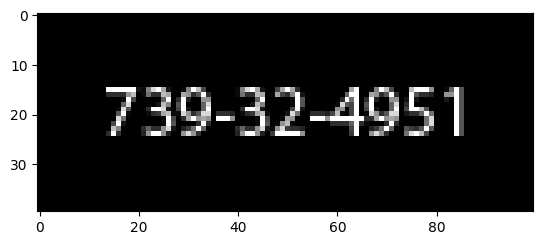

In [4]:
plt.imshow(xmat, cmap="gray")

In [5]:
def blur_operator(m,n,radius):
    imat, jmat = np.meshgrid(np.arange(m), np.arange(n), indexing='ij')
    ivec = np.atleast_2d(imat.flatten())
    jvec = np.atleast_2d(jmat.flatten())
    A = np.fmax(0, 1 - np.sqrt((ivec.T - ivec) ** 2+ (jvec.T - jvec) ** 2)/radius)
    A /= A.sum(axis=1)
    return A

In [7]:
A = blur_operator(xmat.shape[0], xmat.shape[1], 5)

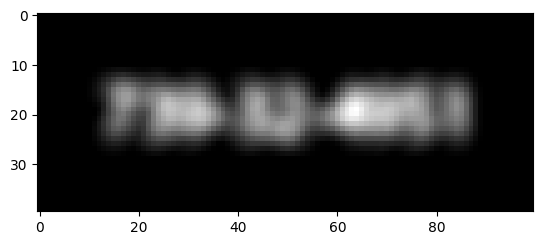

In [8]:
b = A @ x
b2D = b.reshape(xmat.shape)
plt.imshow(b2D, cmap="gray")

In [10]:
P, L, U = sla.lu(A)

In [12]:
y = sla.solve_triangular(L, P.T@b, lower=True)

In [14]:
x_solve = sla.solve_triangular(U, y)

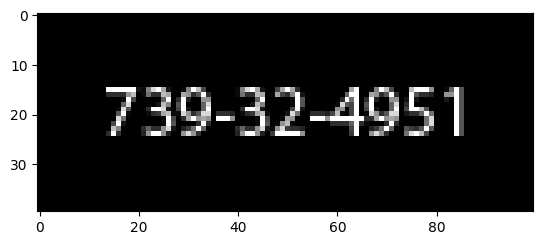

In [16]:
plt.imshow(x_solve.reshape(xmat.shape), cmap="gray")

In [17]:
%timeit sla.solve(A, b)

357 ms ± 70.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit P, L, U = sla.lu(A)

461 ms ± 76.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit sla.solve_triangular(U, y)

5.93 ms ± 46.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


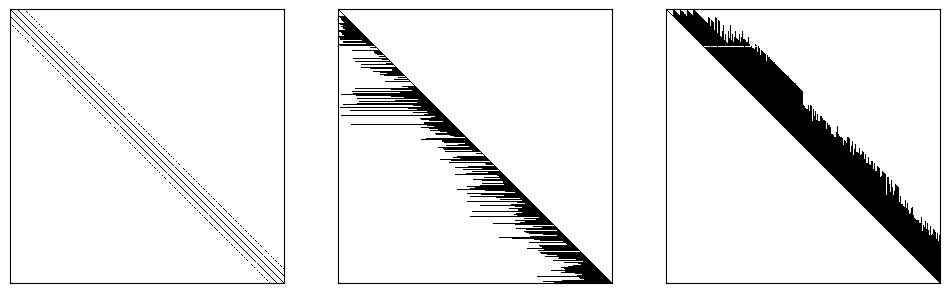

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.spy(A); plt.xticks([]); plt.yticks([]);

plt.subplot(132)
plt.spy(L); plt.xticks([]); plt.yticks([]);

plt.subplot(133)
plt.spy(U); plt.xticks([]); plt.yticks([]);

In [24]:
A_csr = sparse.csr_matrix(A)

In [26]:
%timeit sparse.linalg.spsolve(A_csr, b)

213 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


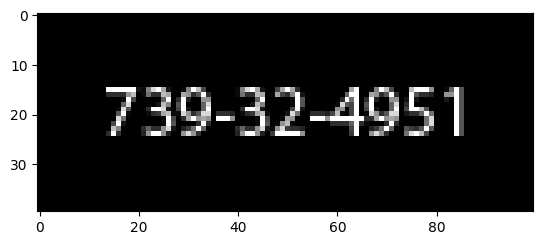

In [27]:
x_solve_3 = sparse.linalg.spsolve(A_csr, b)
plt.imshow(x_solve_3.reshape(xmat.shape), cmap="gray")

In [35]:
n = 4

A= np.array([
    [2.0, 8, 4, 1],
    [1, 2, 3, 3],
    [1, 2, 6, 2],
    [1, 3, 4, 2]
])

# Algorithm 1
# Factorization using the block-format,
# creating new matrices L and U
# and not modifying A
print("LU factorization using Algorithm 1")
U = np.zeros((n, n))
L = np.zeros((n, n))
M = A.copy()
for i in range(n):
    U[i, i:] = M[i, i:]
    M[i+1:, i+1:] -= np.outer(L[i+1:, i], U[i, i+1:])
    print("U = \n", U)
    print("L =\n", L)
    print("M = \n", M)
print("U = \n", U)
print("L =\n", L)

LU factorization using Algorithm 1
U = 
 [[2. 8. 4. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
L =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
M = 
 [[2. 8. 4. 1.]
 [1. 2. 3. 3.]
 [1. 2. 6. 2.]
 [1. 3. 4. 2.]]
U = 
 [[2. 8. 4. 1.]
 [0. 2. 3. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
L =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
M = 
 [[2. 8. 4. 1.]
 [1. 2. 3. 3.]
 [1. 2. 6. 2.]
 [1. 3. 4. 2.]]
U = 
 [[2. 8. 4. 1.]
 [0. 2. 3. 3.]
 [0. 0. 6. 2.]
 [0. 0. 0. 0.]]
L =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
M = 
 [[2. 8. 4. 1.]
 [1. 2. 3. 3.]
 [1. 2. 6. 2.]
 [1. 3. 4. 2.]]
U = 
 [[2. 8. 4. 1.]
 [0. 2. 3. 3.]
 [0. 0. 6. 2.]
 [0. 0. 0. 2.]]
L =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
M = 
 [[2. 8. 4. 1.]
 [1. 2. 3. 3.]
 [1. 2. 6. 2.]
 [1. 3. 4. 2.]]
U = 
 [[2. 8. 4. 1.]
 [0. 2. 3. 3.]
 [0. 0. 6. 2.]
 [0. 0. 0. 2.]]
L =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [39]:
def my_forward_substitution(M,b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        tmp = b[i]
        for j in range(i):
            tmp -= y[j]*M[i,j]
        y[i]=tmp/M[i,i]
    return y

def my_backward_substitution(M,b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n-1, -1, -1):
        tmp = b[i]
        for j in range(i+1, n):
            tmp -= y[j]*M[i,j]
        y[i] = tmp/M[i,i]
    return y

In [40]:
U = np.zeros((n,n))
L = np.zeros((n,n))
M = A.copy()
for i in range(n):
    U[i,i:] = M[i,i:]
    L[i:,i] = M[i:,i]/U[i,i]
    M[i+1:,i+1:] -= np.outer(L[i+1:,i],U[i,i+1:])
    
print("Solve system of equations for ")
b = np.array([2,2,1,4])
print("b = ",b)
x = np.zeros(n)
y = np.zeros(n)

# Foweard-substitution - solve Ly = b for y
y = my_forward_substitution(L, b)
print("y = ",y)

# Backward substitution - solve Ux = y for x
x = my_backward_substitution(U, y)
print("Solution is:")
print("x = ",x)

Solve system of equations for 
b =  [2 2 1 4]
y =  [ 2.  1. -1.  3.]
Solution is:
x =  [-23.   5.   1.   4.]


In [41]:
la.solve(A, b)

array([-23.,   5.,   1.,   4.])

In [43]:
n_values = (10**np.linspace(1, 4, 15)).astype(np.int32)
n_values

array([   10,    16,    26,    43,    71,   117,   193,   316,   517,
         848,  1389,  2275,  3727,  6105, 10000], dtype=int32)

In [44]:
times_matmul = []
times_lu = []
times_chol = []

for n in n_values:
    print(n)
    A = np.random.randn(n, n)
    A = A.T@A
    start_time = time()
    A.dot(A)
    times_matmul.append(time() - start_time)
    start_time = time()
    sla.lu(A)
    times_lu.append(time() - start_time)
    start_time = time()
    sla.cholesky(A)
    times_chol.append(time() - start_time)

10
16
26
43
71
117
193
316
517
848
1389
2275
3727
6105
10000


Text(0, 0.5, 'Wall time [s]')

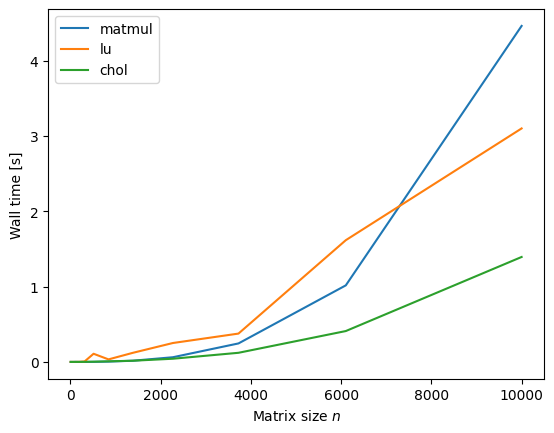

In [45]:
plt.plot(n_values, times_matmul, label='matmul')
plt.plot(n_values, times_lu, label='lu')
plt.plot(n_values, times_chol, label='chol')
plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]")

Text(0, 0.5, 'Wall time [s]')

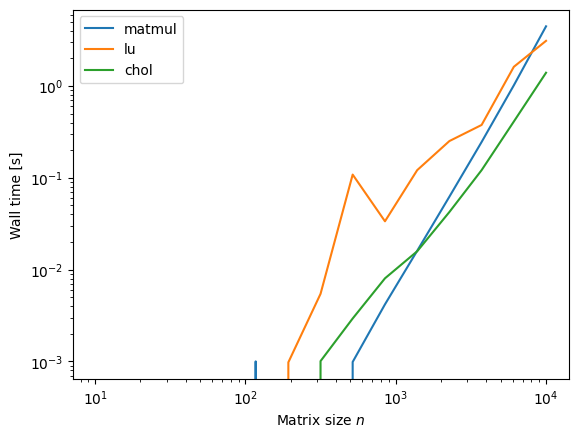

In [46]:
plt.loglog(n_values, times_matmul, label='matmul')
plt.loglog(n_values, times_lu, label='lu')
plt.loglog(n_values, times_chol, label='chol')
plt.legend(loc="best")
plt.xlabel("Matrix size $n$")
plt.ylabel("Wall time [s]")

In [47]:
def myLU(A):
    n = A.shape[0]
    U = np.zeros((n,n))
    L = np.zeros((n,n))
    M = A.copy()
    for i in range(n):
        U[i, i:] = M[i,i:]
        L[i:,i] = M[i:,i]/U[i,i]
        M[i+1:, i+1:] -= np.outer(L[i+1:,i],U[i, i+1:])
    return L,U

In [48]:
# Creating the arrays
c = 1e-16
A = np.array([[c,1.], [-1, 1]])
# xx is the exact solution
xx = np.array([1,1])
b = A.dot(xx)

# Comput the LU
L,U = myLU(A)

# 5olve
# x is the numerical (xhat)
y = sla.solve_triangular(L, b, lower=True)
x = sla.solve_triangular(U, y)

print("Exact solution = ", xx)
print("Computed solution = ",x)
print("Error =", la.norm(xx-x))

Exact solution =  [1 1]
Computed solution =  [0. 1.]
Error = 1.0
